In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
train_data = pd.read_csv("C:/Users/Admin/Desktop/finsearch/NIFTY50_Data.csv")

In [22]:
test_data = pd.read_csv("C:/Users/Admin/Desktop/finsearch/NIFTY50_Data_test.csv")

In [23]:
train_data['Close'] = scaler.fit_transform(train_data[['Close']])
test_data['Close'] = scaler.fit_transform(test_data[['Close']])

In [24]:
X_train = train_data.Date
y_train = train_data['Close']

In [25]:
X_test = test_data.Date
y_test = test_data['Close']

In [26]:
n_features = 1
train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [27]:
from keras.preprocessing.sequence import TimeseriesGenerator
look_back = 20
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 32)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 32)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_neurons  = 50
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse');

model.fit(train_generator,epochs=100, verbose=0);

In [29]:
test_predictions  = model.predict(test_generator)

23/23 [==============================] - 1s 5ms/step


In [30]:
test_data['Close'] = scaler.inverse_transform(test_data[['Close']])
test_predictions   = scaler.inverse_transform(test_predictions)

In [31]:
print(test_predictions)

[[11403.898 ]
 [11367.852 ]
 [11285.903 ]
 [11249.205 ]
 [11169.376 ]
 [11132.01  ]
 [11053.958 ]
 [11051.647 ]
 [11018.968 ]
 [11087.409 ]
 [11180.128 ]
 [11139.513 ]
 [11139.918 ]
 [11151.582 ]
 [11164.774 ]
 [11154.228 ]
 [11094.649 ]
 [10965.28  ]
 [10930.194 ]
 [11048.349 ]
 [11170.718 ]
 [11206.277 ]
 [11150.103 ]
 [11133.021 ]
 [11016.281 ]
 [10964.51  ]
 [10954.427 ]
 [11013.223 ]
 [11088.739 ]
 [11147.195 ]
 [11142.724 ]
 [11169.779 ]
 [11149.883 ]
 [11037.636 ]
 [10973.558 ]
 [10883.924 ]
 [11124.678 ]
 [11485.884 ]
 [11694.363 ]
 [11677.522 ]
 [11670.375 ]
 [11628.703 ]
 [11587.37  ]
 [11514.711 ]
 [11455.559 ]
 [11362.421 ]
 [11289.265 ]
 [11354.596 ]
 [11378.378 ]
 [11420.304 ]
 [11457.917 ]
 [11516.996 ]
 [11565.866 ]
 [11649.086 ]
 [11734.026 ]
 [11736.609 ]
 [11726.868 ]
 [11706.048 ]
 [11696.397 ]
 [11719.391 ]
 [11823.604 ]
 [11923.121 ]
 [11987.863 ]
 [12014.136 ]
 [12041.149 ]
 [12039.804 ]
 [12060.099 ]
 [12099.793 ]
 [12070.0205]
 [12045.072 ]
 [11994.708 ]
 [1198

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

<ipython-input-60-b034a6b2fcca>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


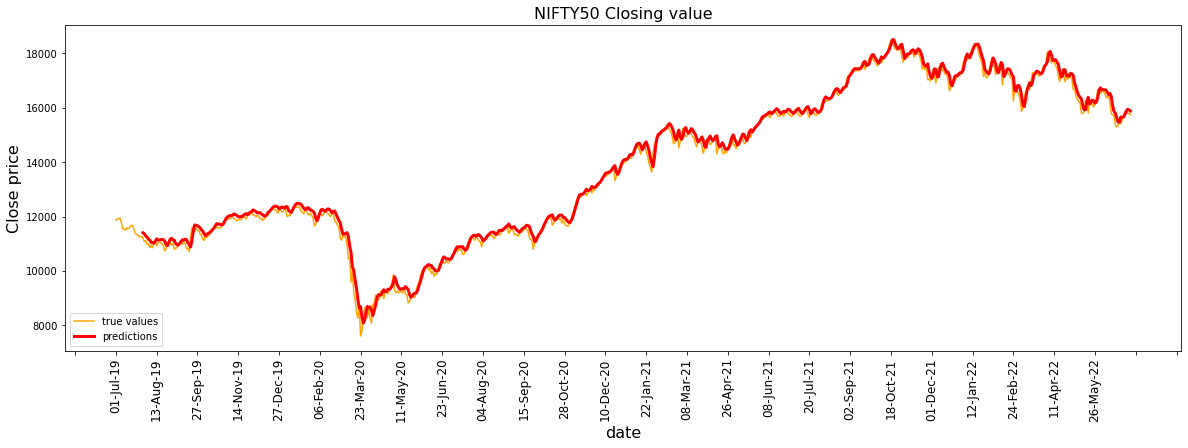

In [60]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values',markevery=30)
plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions',markevery=30)
plt.legend(loc="lower left")
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.xticks(rotation=90, fontsize = 'large')
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price", fontsize=16)
plt.title("NIFTY50 Closing value", fontsize=16);

In [43]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Close'][20:], test_predictions))
print(rmse)

217.5362450359706
